In [10]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import ta
from arch import arch_model

In [7]:
start = "2023"
end = "2023"
data = get_data('BTC', '1h').loc[start : end]
data.shape

(1997, 6)

In [13]:
scale = StandardScaler()
X = scale.fit_transform(data.drop(columns=['symbol']))

In [16]:
X

array([[-2.03949969, -2.048016  , -2.04374824, -2.04600154, -0.93020841],
       [-2.04375301, -2.04417659, -2.03760911, -2.03838739, -1.01604312],
       [-2.0361124 , -2.04314929, -2.0332457 , -2.03953301, -1.0460916 ],
       ...,
       [ 1.82197265,  1.78940399,  1.85089182,  1.8141573 , -1.16857184],
       [ 1.81568346,  1.77842534,  1.83396066,  1.79795103, -1.2800361 ],
       [ 1.79948383,  1.75635391,  1.84018805,  1.79222994, -1.37133485]])

In [15]:
X.shape

(1997, 5)

In [9]:
MA_trans = FunctionTransformer(ma, kw_args = {"window" : 3})
MA_trans.fit_transform(data)

time
2023-01-01 00:00:00             NaN
2023-01-01 01:00:00             NaN
2023-01-01 02:00:00    16543.110000
2023-01-01 03:00:00    16544.233333
2023-01-01 04:00:00    16534.360000
                           ...     
2023-03-25 01:00:00    27503.120000
2023-03-25 02:00:00    27551.516667
2023-03-25 03:00:00    27559.950000
2023-03-25 04:00:00    27572.186667
2023-03-25 05:00:00    27545.256667
Name: close, Length: 1997, dtype: float64

In [4]:
import plotly.express as px
import plotly.graph_objects as go

from ml_fonction import *

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [5]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score

## Data

In [3]:
start = "2017"
end = "2023"
data = get_data('BTC', '1h').loc[start : end]
data.shape

(48978, 6)

In [4]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'symbol'], dtype='object')

## transformer

In [ ]:
def sin_transformer(period):
    return FunctionTransformer(lambda x : np.sin(x / period*2*np.pi))

In [8]:
from sklearn.preprocessing import FunctionTransformer

fnct = FunctionTransformer(lambda x : x['close'].rolling(3).mean())
fnct.fit_transform(data)

time
2017-08-17 04:00:00             NaN
2017-08-17 05:00:00             NaN
2017-08-17 06:00:00     4316.166667
2017-08-17 07:00:00     4329.886667
2017-08-17 08:00:00     4345.010000
                           ...     
2023-03-25 01:00:00    27503.120000
2023-03-25 02:00:00    27551.516667
2023-03-25 03:00:00    27559.950000
2023-03-25 04:00:00    27572.186667
2023-03-25 05:00:00    27545.256667
Name: close, Length: 48978, dtype: float64

In [26]:
x = PrepareData(data)
data = x.data

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -173047.2936925067
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1


c:\Users\cc\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [27]:
data

,volume,returns,h-l,target,ma_3,ma_7,ma_12,ma_24,ma_36,ma_48,...,return,n_day_up_5,n_day_up_7,n_day_up_10,n_day_up_12,n_day_up_24,garch,sar,sar_up,sar_down
time,,,,,,,,,,,,,,,,,,,,,
2017-08-19 03:00:00,19.611920,-0.004301,0.018638,-1,4147.823333,4114.967143,4126.938333,4212.876667,4242.414722,4279.386875,...,-0.004292,40.0,42.857143,40.0,41.666667,37.500000,0.013165,4057.96232,4057.96232,0.00
2017-08-19 04:00:00,17.353232,-0.017130,0.027121,-1,4121.066667,4128.191429,4111.765000,4203.724167,4234.472500,4274.375000,...,-0.016984,40.0,42.857143,40.0,33.333333,37.500000,0.012488,4184.69000,0.00000,4184.69
2017-08-19 05:00:00,12.514194,0.002146,0.023864,1,4094.603333,4122.941429,4102.069167,4193.867500,4228.576944,4269.410000,...,0.002148,40.0,42.857143,40.0,41.666667,37.500000,0.012950,4180.00000,0.00000,4180.00
2017-08-19 06:00:00,51.455431,-0.022355,0.023861,-1,4044.043333,4105.584286,4091.190833,4181.676250,4221.074167,4262.379167,...,-0.022107,40.0,42.857143,40.0,41.666667,37.500000,0.012233,4156.00000,0.00000,4156.00
2017-08-19 07:00:00,31.429222,0.011621,0.025491,1,4032.446667,4087.010000,4082.623333,4170.560417,4212.969722,4255.785000,...,0.011688,40.0,42.857143,50.0,41.666667,37.500000,0.013497,4123.95000,0.00000,4123.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 01:00:00,1532.140450,-0.002100,0.005329,-1,27503.120000,27506.995714,27644.783333,27901.005417,27994.551111,27870.073750,...,-0.002098,40.0,42.857143,40.0,41.666667,45.833333,0.006244,27117.20000,27117.20000,0.00
2023-03-25 02:00:00,1783.067280,0.003671,0.007248,1,27551.516667,27475.290000,27612.333333,27873.782917,28000.958333,27879.422708,...,0.003677,60.0,42.857143,50.0,50.000000,45.833333,0.006030,27210.96000,27210.96000,0.00
2023-03-25 03:00:00,2213.298210,-0.000653,0.003610,-1,27559.950000,27474.837143,27575.967500,27848.590000,27988.079167,27884.328750,...,-0.000653,60.0,42.857143,50.0,41.666667,45.833333,0.005912,27300.40800,27300.40800,0.00


In [28]:
n = data.shape[0]
n_train = int(n*0.8)

train = data.iloc[:n_train]
test = data.iloc[n_train:]

In [29]:
expanding_cv = TimeSeriesSplit(n_splits = 10)

scores = []
for train_index, test_index in expanding_cv.split(train):
    X_train, y_train = train.iloc[train_index].drop(columns=['target']) , train.iloc[train_index]['target']
    X_test, y_test = train.iloc[test_index].drop(columns=['target']), train.iloc[test_index]['target']
    
    model = RandomForestClassifier(n_estimators=200, max_depth = 50, random_state = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = precision_score(y_test, y_pred)
    scores.append(score)
scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [30]:
def precision(y, preds):
    return precision_score(y, preds)

metrics = make_scorer(precision)

In [31]:
model_cv = RandomForestClassifier(n_estimators=200, max_depth = 50, random_state = 1)
cv_scores = cross_validate(
    model_cv, train.drop(columns = 'target'), train.target,
    cv = expanding_cv,
    scoring = metrics
)
cv_scores

{'fit_time': array([ 5.65941834,  9.16178083, 11.43566895, 14.32187963, 16.96810246,
        20.94256878, 25.78250599, 33.94338655, 40.19125772, 36.50590181]),
 'score_time': array([0.17099595, 0.18952799, 0.14500308, 0.14199734, 0.15500474,
        0.15800142, 0.23600531, 0.16600227, 0.14300013, 0.1522789 ]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1795,    0],
       [   0, 1763]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1795
           1       1.00      1.00      1.00      1763

    accuracy                           1.00      3558
   macro avg       1.00      1.00      1.00      3558
weighted avg       1.00      1.00      1.00      3558



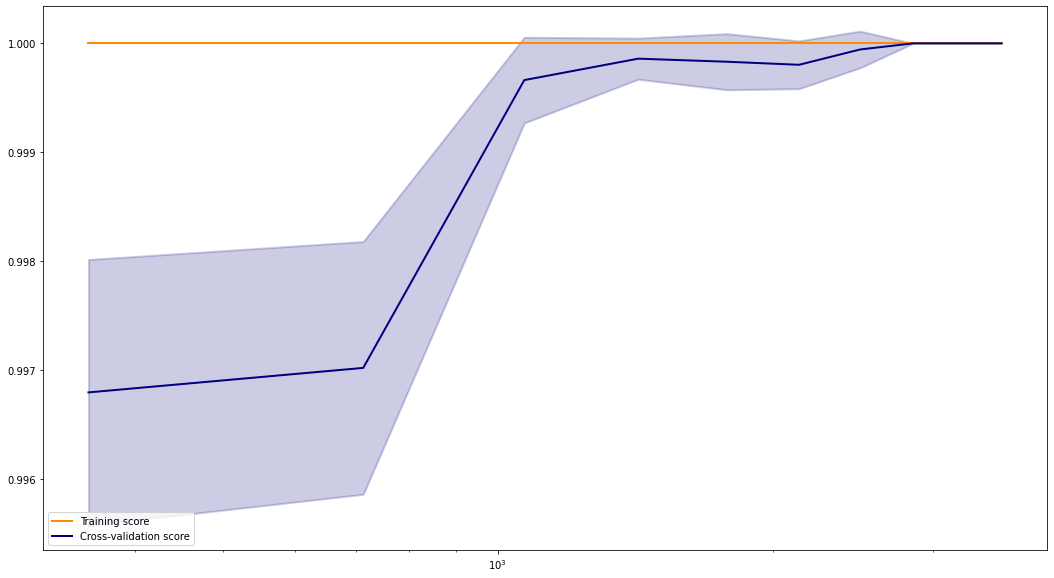

(array([ 356,  712, 1069, 1425, 1782, 2138, 2494, 2851, 3207, 3564]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[0.9980326 , 0.99634626, 0.99550309, 0.99775155, 0.99522203,
         0.99465992, 0.99690838, 0.99747049, 0.9980326 , 0.9980326 ],
        [0.99831366, 0.99662732, 0.99578415, 0.99690838, 0.99522203,
         0.99578415, 0.99662732, 0.9980326 , 0.99859472, 0.99831366],
        [0.99971894, 0.99887577, 1.        , 1.        , 1.        ,
         0.99943789, 0.99915683, 0.99943789, 1.        , 1.        ],
        [0.

In [34]:
learningCurve(RandomForestClassifier(), train.drop(columns = 'target'), train.target, expanding_cv)

In [35]:
precision_score(model.predict(test.drop(columns='target')), test.target)

1.0

In [36]:
x = test.drop(columns='target')
x = x.iloc[-1].values
x = x.reshape(1, -1)
p = model.predict(x)

In [37]:
import joblib

#joblib.dump(model, 'model.joblib')

In [38]:
import joblib
#model = joblib.load('model.joblib')

# Backtesting

In [39]:
def predict(data, target, model):
    if data.shape[0] == 1:
        data = data.values.reshape(-1, 1)
        
    preds = model.predict(data)
    pred_proba_0 = model.predict_proba(data)[:,0]
    pred_proba_1 = model.predict_proba(data)[:,1]
    
    preds = pd.Series(preds, index = target.index, name = "prediction")
    prob_0 = pd.Series(pred_proba_0, index = target.index, name = "proba (-1)")
    prob_1 = pd.Series(pred_proba_1, index = target.index, name = "proba (+1)")
    combined = pd.concat([data['returns'], prob_0, prob_1, target, preds], axis = 1)
    return combined


In [40]:
df = predict(data = test.drop(columns='target'), target = test.target, model = model)
df.head()

,returns,proba (-1),proba (+1),target,prediction
time,,,,,
2022-02-10 10:00:00,0.005488,0.000,1.000,1,1
2022-02-10 11:00:00,0.004241,0.000,1.000,1,1
2022-02-10 12:00:00,-0.000588,0.995,0.005,-1,-1
2022-02-10 13:00:00,-0.026338,0.990,0.010,-1,-1
2022-02-10 14:00:00,0.016207,0.015,0.985,1,1


In [41]:
df['strategy'] = df['returns']*df['prediction']
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)
df

,returns,proba (-1),proba (+1),target,prediction,strategy,cstrategy
time,,,,,,,
2022-02-10 10:00:00,0.005488,0.000,1.000,1,1,0.005488,1.005503e+00
2022-02-10 11:00:00,0.004241,0.000,1.000,1,1,0.004241,1.009777e+00
2022-02-10 12:00:00,-0.000588,0.995,0.005,-1,-1,0.000588,1.010371e+00
2022-02-10 13:00:00,-0.026338,0.990,0.010,-1,-1,0.026338,1.037336e+00
2022-02-10 14:00:00,0.016207,0.015,0.985,1,1,0.016207,1.054285e+00
...,...,...,...,...,...,...,...
2023-03-25 01:00:00,-0.002100,0.995,0.005,-1,-1,0.002100,1.006475e+17
2023-03-25 02:00:00,0.003671,0.000,1.000,1,1,0.003671,1.010176e+17
2023-03-25 03:00:00,-0.000653,1.000,0.000,-1,-1,0.000653,1.010836e+17


In [42]:
df[df['proba (+1)'] > 0.7]

,returns,proba (-1),proba (+1),target,prediction,strategy,cstrategy
time,,,,,,,
2022-02-10 10:00:00,0.005488,0.000,1.000,1,1,0.005488,1.005503e+00
2022-02-10 11:00:00,0.004241,0.000,1.000,1,1,0.004241,1.009777e+00
2022-02-10 14:00:00,0.016207,0.015,0.985,1,1,0.016207,1.054285e+00
2022-02-10 15:00:00,0.013236,0.015,0.985,1,1,0.013236,1.068333e+00
2022-02-10 16:00:00,0.009648,0.000,1.000,1,1,0.009648,1.078690e+00
...,...,...,...,...,...,...,...
2023-03-24 18:00:00,0.004698,0.000,1.000,1,1,0.004698,9.733633e+16
2023-03-24 19:00:00,0.002937,0.000,1.000,1,1,0.002937,9.762262e+16
2023-03-24 23:00:00,0.005714,0.000,1.000,1,1,0.005714,1.000650e+17
